In [1]:
import sys
sys.path.insert(0, '../')
from lib import *

%matplotlib inline

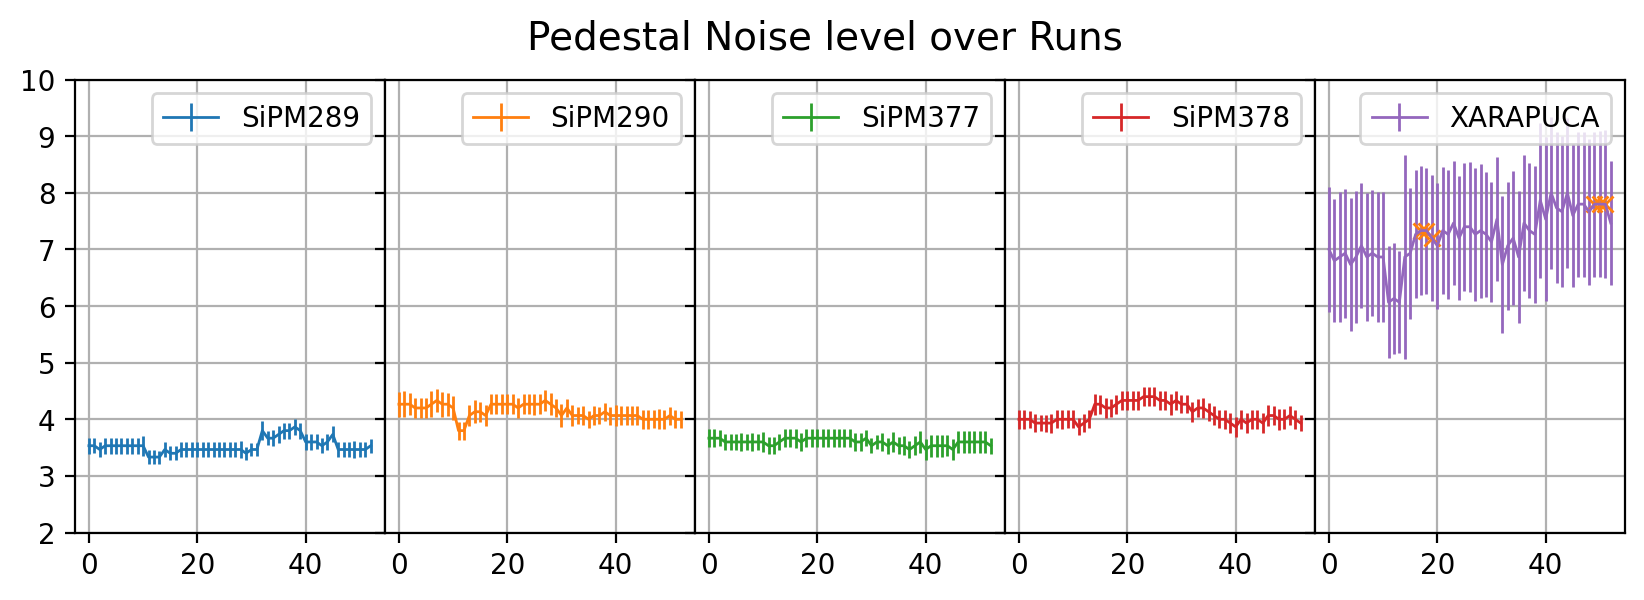

In [34]:


# WEEK="APSAIA_VUV";
WEEK="DAPHNE_VIS";
path="/scr/neutrinos/rodrigoa/"+WEEK+"/joython/"
Runs=open_runs_table("../macros/"+WEEK+".xlsx")


# path="/media/rodrigoa/DiscoDuro/SBND_XA_PDE/APSAIA_VUV/joython/"


mean=np.zeros((len(Runs["Channels"].iloc[0]),Runs["Run"].array.shape[0]))
ress=np.zeros((len(Runs["Channels"].iloc[0]),Runs["Run"].array.shape[0]))

i=0
for ch in Runs["Channels"].iloc[0]:
    r=0;
    for run in Runs["Run"].array:
        
        Run_props=Runs[Runs["Run"]==run].iloc[0]
        run_path=path+"run"+str(run).zfill(2)+"/";
        compress=False
        Pedestal_vars=open_run_var(run_path,"Pedestal_vars_SW",[ch],compressed=compress)
        
        counts, bins=np.histogram(Pedestal_vars[ch]["STD"], 300,[0,20])
        mode=bins[np.argmax(counts)]
        resolution=np.std(Pedestal_vars[ch]["STD"][Pedestal_vars[ch]["STD"]<20])
        mean[i,r]=mode
        ress[i,r]=resolution
        r+=1;
    i+=1;


x=Runs["Run"].array
ys=mean
yer=ress
legend=Run_props["ChannelName"]

fig,axs=horizontal_subplots(x,ys,yer,legend)

noise_runs=(Runs["Type"]=="Noise").array.to_numpy()
axs[-1].plot(x[noise_runs].to_numpy(),ys[-1][noise_runs],'x',color="tab:orange")

## Single Run, channels distribution

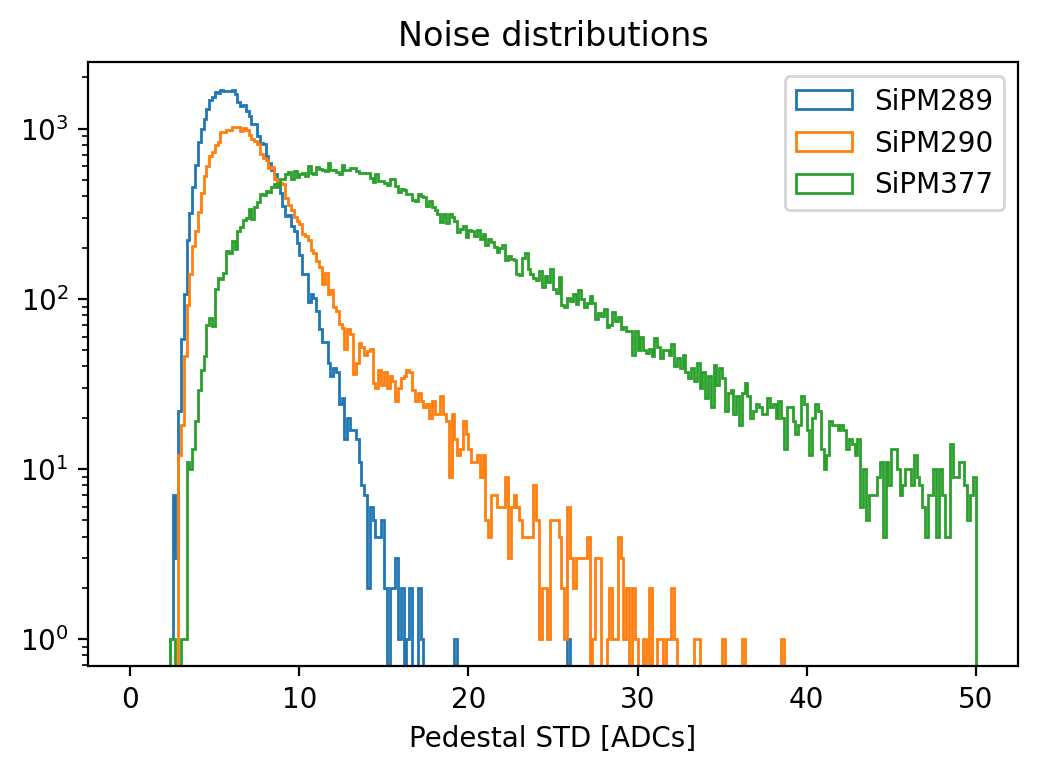

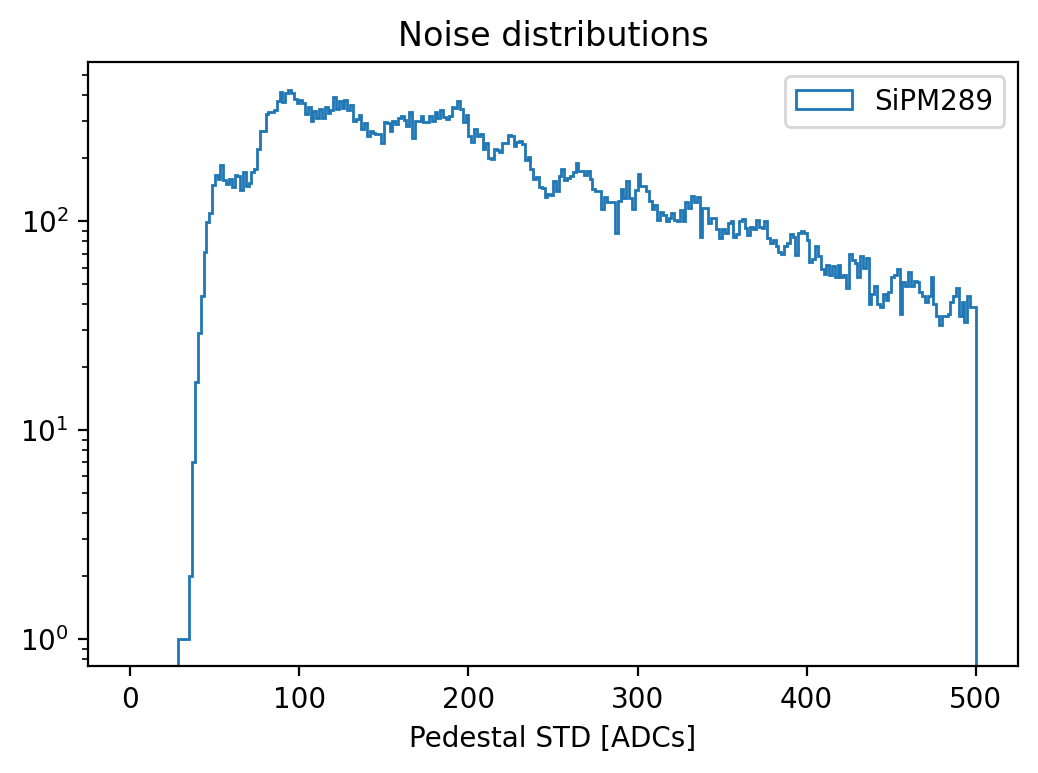

In [40]:
WEEK="DAPHNE_VIS";
WEEK="APSAIA_VUV";


plt.figure(dpi=200)
for week in ["APSAIA_VIS","APSAIA_VUV","DAPHNE_VIS"]:
    WEEK=week
    path="/scr/neutrinos/rodrigoa/"+WEEK+"/joython/"
    Runs=open_runs_table("../macros/"+WEEK+".xlsx")
    for run in [2]:
        Run_props=Runs[Runs["Run"]==run].iloc[0]
        run_path=path+"run"+str(run).zfill(2)+"/";

        compress=False

        for ch in [5]:
        # for ch in Run_props["Channels"]:
            Pedestal_vars=open_run_var(run_path,"Pedestal_vars",[ch],compressed=compress)
            plt.hist(Pedestal_vars[ch]["STD"], 300,[0,50],histtype="step")
            
            # Peak_vars=open_run_var(run_path,"Peak_vars",[ch],compressed=compress)
            # plt.hist(Peak_vars[ch]["Peak"], 300,[0,500],histtype="step")
            
        plt.legend(Run_props["ChannelName"])
        plt.title ("Noise distributions")
        plt.xlabel("Pedestal STD [ADCs]")
        plt.semilogy()

plt.figure(dpi=200)
for week in ["DAPHNE_VIS"]:
    WEEK=week
    path="/scr/neutrinos/rodrigoa/"+WEEK+"/joython/"
    Runs=open_runs_table("../macros/"+WEEK+".xlsx")
    for run in [4]:
        Run_props=Runs[Runs["Run"]==run].iloc[0]
        run_path=path+"run"+str(run).zfill(2)+"/";

        compress=False

        for ch in [5]:
        # for ch in Run_props["Channels"]:
            # Pedestal_vars=open_run_var(run_path,"Pedestal_vars",[ch],compressed=compress)
            # plt.hist(Pedestal_vars[ch]["STD"], 300,[0,100],histtype="step",density=True)
            
            Peak_vars=open_run_var(run_path,"Peak_vars"        ,Run_props["Channels"],compressed=compress)
            Charge_vars=open_run_var(run_path,"Charge_vars"    ,Run_props["Channels"],compressed=compress);
            Pedestal_vars=open_run_var(run_path,"Pedestal_vars",Run_props["Channels"],compressed=compress)
            
            plt.hist(Peak_vars[ch]["Peak"], 300,[0,500],histtype="step")
            
        plt.legend(Run_props["ChannelName"])
        plt.title ("Noise distributions")
        plt.xlabel("Pedestal STD [ADCs]")
        plt.semilogy()

[]

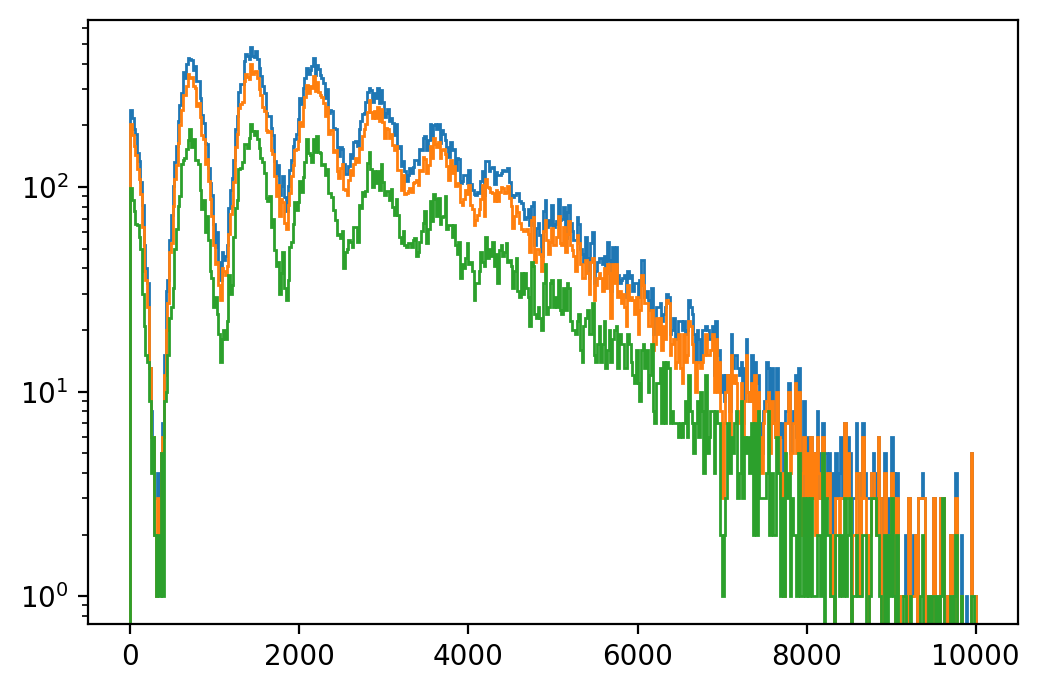

In [51]:
plt.figure(dpi=200)
ch=0

plt.hist(Charge_vars[ch]["ChargeRangeAverageWvf"][Pedestal_vars[ch]["STD"]<5.]  ,  500,[0,10000],histtype="step");
plt.hist(Charge_vars[ch]["ChargeRangeAverageWvf"][Pedestal_vars[ch]["STD"]<4.]  ,  500,[0,10000],histtype="step");
plt.hist(Charge_vars[ch]["ChargeRangeAverageWvf"][Pedestal_vars[ch]["STD"]<3.5] ,  500,[0,10000],histtype="step");

plt.semilogy()

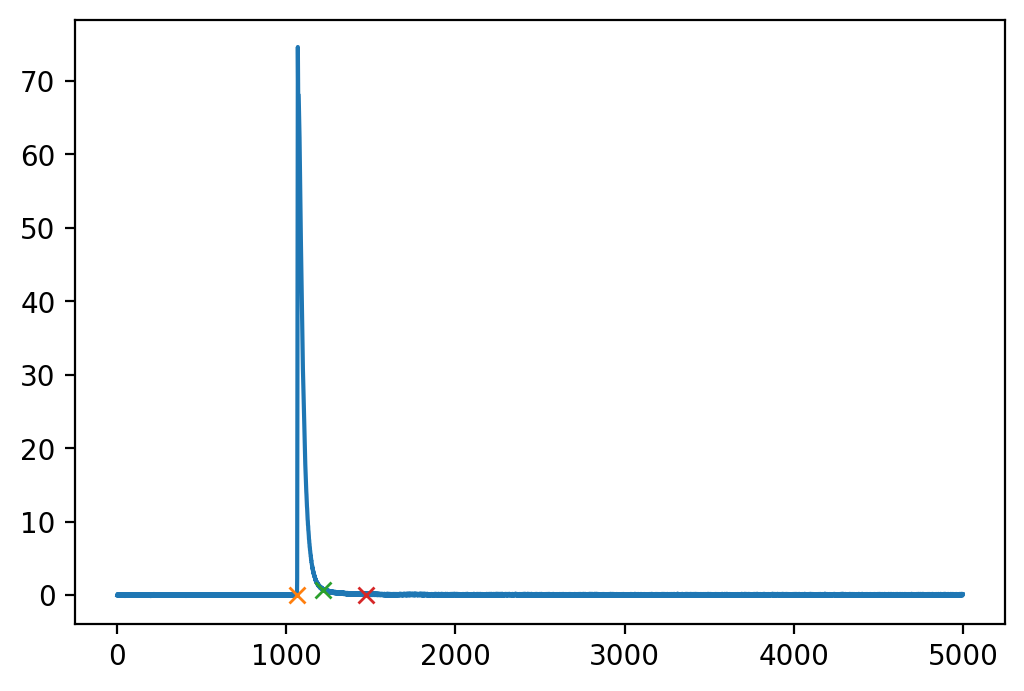

In [29]:
ch=0
RawADC=open_run_var(run_path,"RawADC",[ch],compressed=compress)

aver=np.mean(RawADC[ch],axis=0)
aver=aver-np.mean(aver[0:100])
if not ch==5:aver*=-1;

plt.figure(dpi=200)

plt.plot(aver)

left,right = find_bins(aver,0.01)
plt.plot(left,aver[left],'x')
plt.plot(right,aver[right],'x')
left,right = find_bins(aver,0.)
plt.plot(right,aver[right],'x')